<a href="https://colab.research.google.com/github/CeciliaMarson/CMLS-Homework1/blob/master/Braian_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Computer Music (Valence and Arousal)


###**Setup**

####Load libraries and files from google drive

In [1]:
import numpy as np
import librosa, librosa.display
import os
import matplotlib.pyplot as plt
import sklearn.svm
import IPython.display as ipd
import scipy as sp
import pandas as pd
import csv
import seaborn as seabornInstance
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget --no-check-certificate -r "https://drive.google.com/u/0/uc?id=10CfTAIlhD1bWER1temxNYcda7lfNupt3&export=download" -O "annotations.zip"

will be placed in the single file you specified.

--2020-05-07 04:29:21--  https://drive.google.com/u/0/uc?id=10CfTAIlhD1bWER1temxNYcda7lfNupt3&export=download
Resolving drive.google.com (drive.google.com)... 74.125.20.139, 74.125.20.101, 74.125.20.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/19i25s7sfgf0g7l0q56f1upfl8ci0p44/1588825725000/18317275537345979741/*/10CfTAIlhD1bWER1temxNYcda7lfNupt3?e=download [following]
--2020-05-07 04:29:34--  https://doc-0s-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/19i25s7sfgf0g7l0q56f1upfl8ci0p44/1588825725000/18317275537345979741/*/10CfTAIlhD1bWER1temxNYcda7lfNupt3?e=download
Resolving doc-0s-48-docs.googleusercontent.com (doc-0s-48-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecti

In [3]:
!unzip annotations.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/annotations/annotations per each rater/dynamic (per second annotations)/valence/._1250.csv  
  inflating: annotations/annotations per each rater/dynamic (per second annotations)/valence/1244.csv  
  inflating: __MACOSX/annotations/annotations per each rater/dynamic (per second annotations)/valence/._1244.csv  
  inflating: annotations/annotations per each rater/dynamic (per second annotations)/valence/908.csv  
  inflating: __MACOSX/annotations/annotations per each rater/dynamic (per second annotations)/valence/._908.csv  
  inflating: annotations/annotations per each rater/dynamic (per second annotations)/valence/1522.csv  
  inflating: __MACOSX/annotations/annotations per each rater/dynamic (per second annotations)/valence/._1522.csv  
  inflating: annotations/annotations per each rater/dynamic (per second annotations)/valence/1293.csv  
  inflating: __MACOSX/annotations/annotations per each rater/dynamic (per s

#### Read .csv files

In [0]:
# get dataframe from annotations file
annotations = pd.read_csv('/content/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv')

In [0]:
features_file = pd.read_csv('/content/features_mean-std.csv')
features_file_mod = features_file.drop(columns=[' valence_mean', ' valence_std', ' arousal_mean', ' arousal_std'])
feat_array = np.array(features_file_mod)
feat_array2 = features_file[['rolloff_mean', 'spectral_centroid_mean', 'mfcc1_mean', 'SONE_mean15', 'SONE_mean16', 'SONE_mean17', 'SONE_mean18', 'SONE_mean19', 'SONE_mean20', 'SONE_mean21', 'SONE_mean22', 'SONE_mean23', 'SONE_std15', 'SONE_std16', 'SONE_std17', 'SONE_std18', 'SONE_std19', 'SONE_std20', 'SONE_std21', 'SONE_std22', 'SONE_std23']].values
feat_array3 = features_file[['rolloff_mean', 'spectral_centroid_mean', 'mfcc1_mean']].values

###**Linear Regression**

#### Normalize for Linear Regression

In [0]:
annot1 = annotations[' valence_mean'].values
annot2 = annotations[' valence_std'].values
annot3 = annotations[' arousal_mean'].values
annot4 = annotations[' arousal_std'].values

In [0]:
#Normalize X (Features)

#Normalize X (All Features)
t_ft_max = np.max(feat_array, axis=0)
t_ft_min = np.min(feat_array, axis=0)
feat_array_norm = (feat_array - t_ft_min) / (t_ft_max - t_ft_min)
X_ln = feat_array_norm
X_ln_df = pd.DataFrame(X_ln)

#Normalize X2 (Select Features A)
#t_ft_max = np.max(feat_array2, axis=0)
#t_ft_min = np.min(feat_array2, axis=0)
#feat_array_norm2 = (feat_array2 - t_ft_min) / (t_ft_max - t_ft_min)
#X_ln_2 = feat_array_norm2

#Normalize X3 (Select Features B)
#t_ft_max = np.max(feat_array3, axis=0)
#t_ft_min = np.min(feat_array3, axis=0)
#feat_array_norm3 = (feat_array3 - t_ft_min) / (t_ft_max - t_ft_min)
#X_ln_3 = feat_array_norm3


#Normalize Y (Annotations)

#Normalize valence_mean
t_an_max = np.max(annot1, axis=0)
t_an_min = np.min(annot1, axis=0)
annot_norm = (annot1 - t_an_min) / (t_an_max - t_an_min)
y = annot_norm

#Normalize valence_std
t_an_max = np.max(annot2, axis=0)
t_an_min = np.min(annot2, axis=0)
annot_norm2 = (annot2 - t_an_min) / (t_an_max - t_an_min)
y2 = annot_norm2

#Normalize arousal_mean
t_an_max = np.max(annot3, axis=0)
t_an_min = np.min(annot3, axis=0)
annot_norm3 = (annot3 - t_an_min) / (t_an_max - t_an_min)
y3 = annot_norm3

#Normalize arousal_std
t_an_max = np.max(annot4, axis=0)
t_an_min = np.min(annot4, axis=0)
annot_norm4 = (annot4 - t_an_min) / (t_an_max - t_an_min)
y4 = annot_norm4

#### Train and test split for Linear Regression


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ln, y, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ln, y2, test_size=0.2, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_ln, y3, test_size=0.2, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_ln, y4, test_size=0.2, random_state=0)

#### Training and Prediction for Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

regressor2 = LinearRegression()  
regressor2.fit(X_train2, y_train2)

regressor3 = LinearRegression()  
regressor3.fit(X_train3, y_train3)

regressor4 = LinearRegression()  
regressor4.fit(X_train4, y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)
y_pred2 = regressor2.predict(X_test2)
y_pred3 = regressor3.predict(X_test3)
y_pred4 = regressor4.predict(X_test4)

#### Results for Linear Regression

In [0]:
def compute_metrics(y_tested,y_predicted):
  mse = sklearn.metrics.mean_squared_error(y_tested, y_predicted)
  r2 = sklearn.metrics.r2_score(y_tested, y_predicted)
  print("Results : \n MSE = {} \n R2 = {} \n".format(mse, r2))

In [28]:
print('Valence_mean')
compute_metrics(y_test,y_pred)
print('Valence_std')
compute_metrics(y_test2,y_pred2)
print('Arousal_mean')
compute_metrics(y_test3,y_pred3)
print('Arousal_std')
compute_metrics(y_test4,y_pred4)

Valence_mean
Results : 
 MSE = 0.013636676123591235 
 R2 = 0.48474094770560827 

Valence_std
Results : 
 MSE = 0.02150487598049287 
 R2 = -0.03425225185398517 

Arousal_mean
Results : 
 MSE = 0.018221294917818893 
 R2 = 0.5108249570614336 

Arousal_std
Results : 
 MSE = 0.028577565151648627 
 R2 = -0.019288588624655878 



###**Support Vector Regression**

#### Standarization for Support Vector Regression

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_svr = sc_X.fit_transform(feat_array)
Y_42 = sc_y.fit_transform(annotations)
Y = Y_42[:,1] #Select valance_mean as Y
Y2 = Y_42[:,2] #Select valance_std as Y2
Y3 = Y_42[:,3] #Select arousal_mean as Y3
Y4 = Y_42[:,4] #Select arousal_std as Y4 

#### Train and test split for Support Vector Regression


In [0]:
from sklearn.model_selection import train_test_split
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, Y, test_size=0.2, random_state=0)
X_train_svr2, X_test_svr2, y_train_svr2, y_test_svr2 = train_test_split(X_svr, Y2, test_size=0.2, random_state=0)
X_train_svr3, X_test_svr3, y_train_svr3, y_test_svr3 = train_test_split(X_svr, Y3, test_size=0.2, random_state=0)
X_train_svr4, X_test_svr4, y_train_svr4, y_test_svr4 = train_test_split(X_svr, Y4, test_size=0.2, random_state=0)

#### Training and Prediction for Support Vector Regression

In [39]:
from sklearn.svm import SVR
SupportVectorRegModel = SVR()
SupportVectorRegModel.fit(X_train_svr, y_train_svr)

SupportVectorRegModel2 = SVR()
SupportVectorRegModel2.fit(X_train_svr2, y_train_svr2)

SupportVectorRegModel3 = SVR()
SupportVectorRegModel3.fit(X_train_svr3, y_train_svr3)

SupportVectorRegModel4 = SVR()
SupportVectorRegModel4.fit(X_train_svr4, y_train_svr4)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_svr = SupportVectorRegModel.predict(X_test_svr)
y_pred_svr2 = SupportVectorRegModel.predict(X_test_svr2)
y_pred_svr3 = SupportVectorRegModel.predict(X_test_svr3)
y_pred_svr4 = SupportVectorRegModel.predict(X_test_svr4)


#### Results for Support Vector Regression

In [42]:
print('Valence_mean')
compute_metrics(y_test_svr,y_pred_svr)
print('Valence_std')
compute_metrics(y_test_svr2,y_pred_svr2)
print('Arousal_mean')
compute_metrics(y_test_svr3,y_pred_svr3)
print('Arousal_std')
compute_metrics(y_test_svr4,y_pred_svr4)

Valence_mean
Results : 
 MSE = 0.42183617594745926 
 R2 = 0.5252431318871766 

Valence_std
Results : 
 MSE = 1.9099944571328096 
 R2 = -1.0182086997703133 

Arousal_mean
Results : 
 MSE = 0.6173028803734926 
 R2 = 0.3482794823899247 

Arousal_std
Results : 
 MSE = 1.4008845757583235 
 R2 = -0.484104058485078 



###**Plots and Features Correlation**

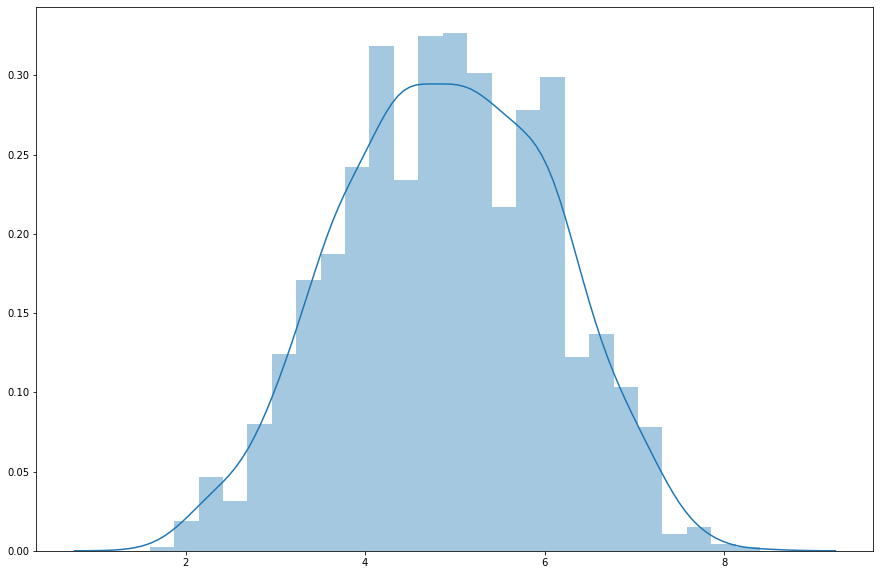

In [88]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(annot1)

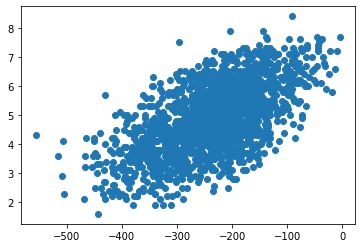

In [137]:
plt.plot(features_file.loc[:,'mfcc1_mean'], annotations.loc[:, ' valence_mean'], 'o')   
plt.show()

In [0]:
#Using Pearson Correlation
database = features_file
plt.figure(figsize=(20,12))
cor = database.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [109]:
#Correlations with output variables
cor_target = abs(cor[" valence_mean"])
cor_target2 = abs(cor[" valence_std"])
cor_target3 = abs(cor[" arousal_mean"])
cor_target4 = abs(cor[" arousal_std"])
#Selecting highly correlated features
relevant_feat = cor_target[cor_target>0.5]
relevant_feat2 = cor_target2[cor_target2>0.5]
relevant_feat3 = cor_target3[cor_target3>0.5]
relevant_feat4 = cor_target4[cor_target4>0.5]
print('  Valence_mean : \n\n{}\n\n  Valence_std : \n\n{}\n\n  Arousal_mean : \n\n{}\n\n  Arousal_std : \n\n{}'.format(relevant_feat, relevant_feat2, relevant_feat3, relevant_feat4))

  Valence_mean : 

rolloff_mean              0.545632
spectral_centroid_mean    0.539344
mfcc1_mean                0.611100
SONE_mean15               0.517057
SONE_mean16               0.522490
SONE_mean17               0.547946
SONE_mean18               0.551780
SONE_mean19               0.549063
SONE_mean20               0.543752
SONE_mean21               0.532626
SONE_mean22               0.510537
SONE_std15                0.517057
SONE_std16                0.522490
SONE_std17                0.547946
SONE_std18                0.551780
SONE_std19                0.549063
SONE_std20                0.543752
SONE_std21                0.532626
SONE_std22                0.510537
 valence_mean             1.000000
 arousal_mean             0.588053
Name:  valence_mean, dtype: float64

  Valence_std : 

 valence_std    1.0
Name:  valence_std, dtype: float64

  Arousal_mean : 

rolloff_mean              0.553496
spectral_centroid_mean    0.541374
mfcc1_mean                0.578877
 valence_me